In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv("../music_genre_dataset.csv", sep=',')
df_ = df.drop('Жанр', axis=1)
df_

,BPM,RMS Energy,Zero-Crossing Rate
0,107,0.667570,0.273374
1,91,0.206187,0.118396
2,72,0.239163,0.070668
3,118,0.448361,0.107527
4,100,0.739468,0.195543
...,...,...,...
195,141,0.699088,0.276072
196,72,0.236141,0.103938
197,123,0.573758,0.293730
198,122,0.217458,0.173312


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

Корреляция Пирсона:
                          BPM  RMS Energy  Zero-Crossing Rate
BPM                 1.000000    0.591573            0.489428
RMS Energy          0.591573    1.000000            0.651859
Zero-Crossing Rate  0.489428    0.651859            1.000000

Корреляция Спирмена:
                          BPM  RMS Energy  Zero-Crossing Rate
BPM                 1.000000    0.604318            0.498168
RMS Energy          0.604318    1.000000            0.590596
Zero-Crossing Rate  0.498168    0.590596            1.000000


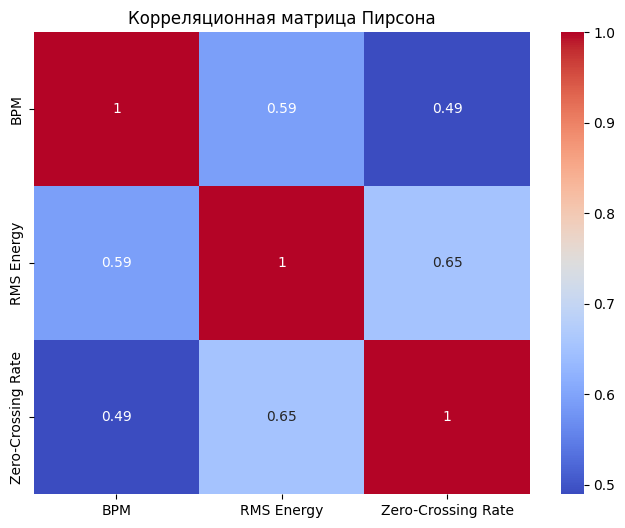

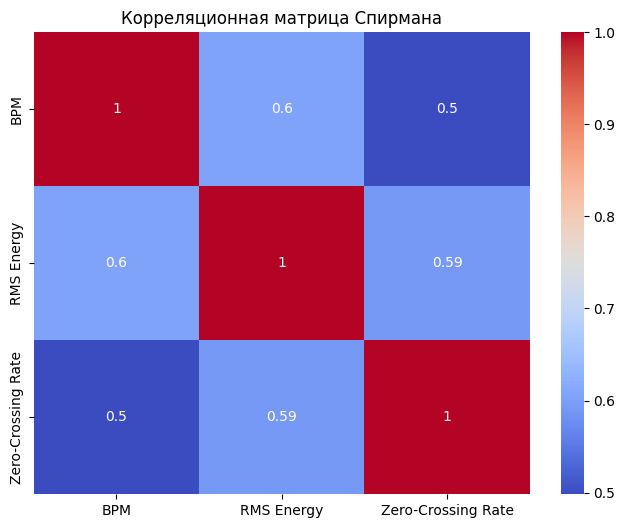

In [9]:
pearson_corr = df_.corr(method='pearson')
spearman_corr = df_.corr(method='spearman')
print("Корреляция Пирсона:\n", pearson_corr)
print("\nКорреляция Спирмена:\n", spearman_corr)

plt.figure(figsize=(8, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm')
plt.title("Корреляционная матрица Пирсона")
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm')
plt.title("Корреляционная матрица Спирмана")
plt.show()

                            OLS Regression Results                            
Dep. Variable:             RMS Energy   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     106.6
Date:                Thu, 17 Apr 2025   Prob (F-statistic):           2.87e-20
Time:                        22:36:43   Log-Likelihood:                 94.525
No. Observations:                 200   AIC:                            -185.1
Df Residuals:                     198   BIC:                            -178.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1767      0.055     -3.210      0.0

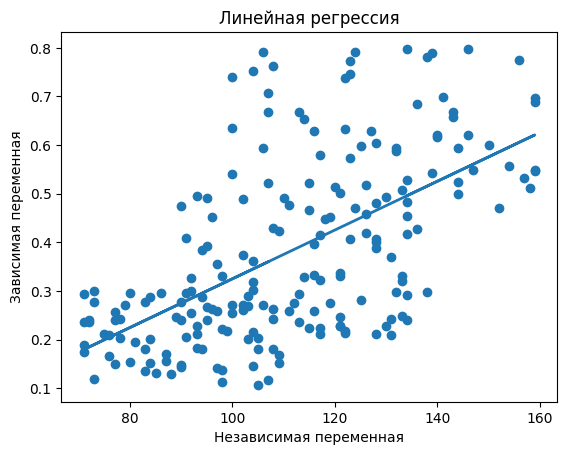

In [11]:
import statsmodels.api as sm
X = df_['BPM']  # Независимая переменная (Series)
Y = df_['RMS Energy']  # Зависимая переменная (Series)

X = sm.add_constant(X)  # Добавляем константу
model = sm.OLS(Y, X).fit()  # Строим модель
print(model.summary())  # Сводная статистика

# Визуализация результатов
plt.scatter(df_['BPM'], df_['RMS Energy'])
plt.plot(df_['BPM'], model.predict(X), linewidth=2)
plt.title("Линейная регрессия")
plt.xlabel("Независимая переменная")
plt.ylabel("Зависимая переменная")
plt.show()